
### Introduction

The dataset used in this analysis is the complete, cleaned results of the 2022 Stack Overflow Developer Survey. The survey was conducted from 2011, to 2022, and includes responses from developers around the world. The dataset spans four years: 2019, 2020, 2021, and 2022.

In this analysis, we aim to answer several business questions based on the survey data, including changes in employment types, trends in learning coding, and the top programming languages used in the Netherlands.

Let's proceed with the exploration and analysis.




In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read the survey data for the years 2019, 2020, and 2021
df_2019 = pd.read_csv('/content/survey_results_public2019.csv')
df_2020 = pd.read_csv('/content/survey_results_public2020.csv')
df_2021 = pd.read_csv('/content/survey_results_public2021.csv')
df_2022 = pd.read_csv('/content/survey_results_public2022.csv')


In [3]:
# Display the first few rows of the DataFrame df_2019
df_2019.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
# Display the first few rows of the DataFrame df_2020
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
# Display the first few rows of the DataFrame df_2021
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [6]:
# Display the first few rows of the DataFrame df_2022
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [7]:
# Get the column names of the DataFrame and convert them to a list
column_names = df_2019.columns.tolist()

# Print the column names
print("Column Names:", column_names)



Column Names: ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisit

In [8]:
# Get the column names of the DataFrame and convert them to a list
column_names = df_2020.columns.tolist()

# Print the column names
print("Column Names:", column_names)


Column Names: ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']


In [9]:
# Get the column names of the DataFrame and convert them to a list
column_names = df_2021.columns.tolist()

# Print the column names
print("Column Names:", column_names)


Column Names: ['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly']


In [10]:
# Get the column names of the DataFrame and convert them to a list
column_names = df_2022.columns.tolist()

# Print the column names
print("Column Names:", column_names)

Column Names: ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount',


# Business Question 1

### What is the change in employment types from 2019 to 2021?

To answer this question, we will first clean the data by dropping rows where the 'EmploymentType' column is missing or null. We will then calculate the count and percentage of each employment type for the years 2019, 2020, and 2021. Finally, we will visualize the distribution of employment types using bar plots.

In [11]:

def clean_data(df):
    """
    Clean the DataFrame by dropping rows where 'EmploymentType' column is missing or null.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Cleaned DataFrame.
    """
    # Dropping rows where 'EmploymentType' column is missing or null
    df_cleaned = df.dropna(subset=['Employment'])
    return df_cleaned

# Cleaning all DataFrames
df_2019_cleaned = clean_data(df_2019)
df_2020_cleaned = clean_data(df_2020)
df_2021_cleaned = clean_data(df_2021)


In [12]:
# Calculate the count of each employment type for each year
def calculate_employment_interval(df):
    """
    Calculate the count of each employment type in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the 'Employment' column.

    Returns:
    - pd.Series: Series containing the count of each employment type.
    """
    employment_counts = df['Employment'].value_counts()
    return employment_counts

# Calculate employment intervals for each year
employment_2019 = calculate_employment_interval(df_2019_cleaned)
employment_2020 = calculate_employment_interval(df_2020_cleaned)
employment_2021 = calculate_employment_interval(df_2021_cleaned)


In [13]:
def calculate_percentages(employment_counts, total_responses):
    """
    Calculate the percentages for each employment type.

    Parameters:
    - employment_counts (pd.Series): Series containing counts of each employment type.
    - total_responses (int): Total number of responses in the dataset.

    Returns:
    - pd.Series: Series containing the percentages for each employment type.
    """
    percentages = (employment_counts / total_responses) * 100
    return percentages

# Calculate total responses for each year
total_responses_2019 = len(df_2019_cleaned)
total_responses_2020 = len(df_2020_cleaned)
total_responses_2021 = len(df_2021_cleaned)

# Calculate percentages for each year
percentages_2019 = calculate_percentages(employment_2019, total_responses_2019)
percentages_2020 = calculate_percentages(employment_2020, total_responses_2020)
percentages_2021 = calculate_percentages(employment_2021, total_responses_2021)


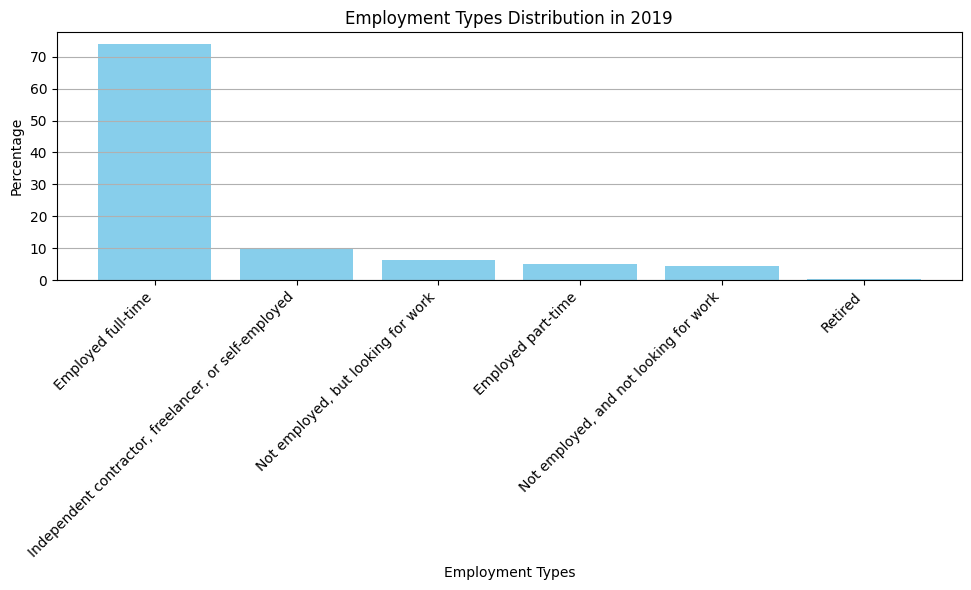

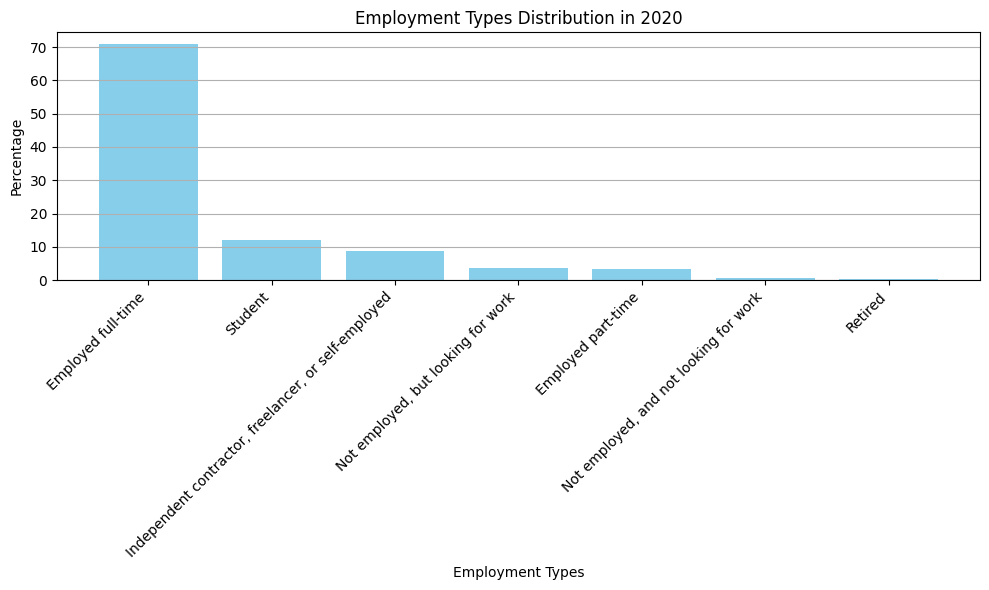

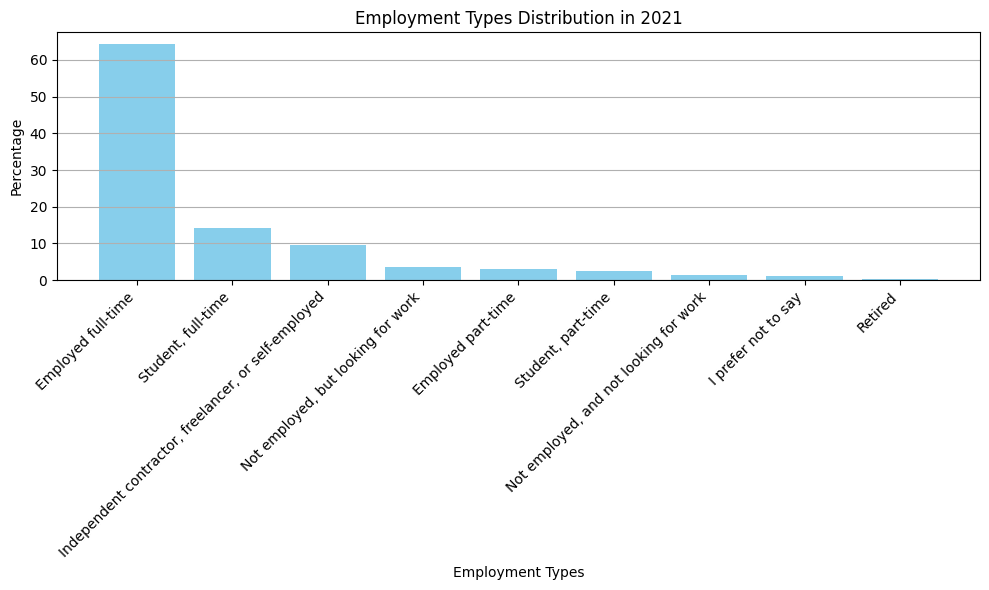

In [14]:

def visualize_employment_distribution(percentage_data, year):
    """
    Create a bar plot to visualize employment distribution for a specific year.

    Parameters:
    - percentage_data (pd.Series): Series containing percentages of each employment type.
    - year (int): The year for which the distribution is visualized.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 6))
    plt.bar(percentage_data.index, percentage_data, color='skyblue')
    plt.title(f'Employment Types Distribution in {year}')
    plt.xlabel('Employment Types')
    plt.ylabel('Percentage')
    plt.grid(axis='y')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualize employment distribution for each year using the modified function
visualize_employment_distribution(percentages_2019, 2019)
visualize_employment_distribution(percentages_2020, 2020)
visualize_employment_distribution(percentages_2021, 2021)


### Observations and Insights:

The bar plots show the distribution of employment types for the years 2019, 2020, and 2021. The percentage of respondents in each employment type gives insights into the evolving landscape of employment in the software development industry. From the plots, we observe that more than 60% are Employed full-time, more than 10% are Students, slightly below 10% are cortractors, freelancers ore self-employed and the other types are all under 5%.

# Business Question 2:
### What changes happened in learning coding between 2021 and 2022?

To address this question, we will clean and prepare the data by dropping rows with missing values in the 'LearnCode' column. We will then calculate the interval of 'LearnCode' by counting the occurrences of each learning method for the years 2021 and 2022. A pie chart will be used to visualize the top ways people learned to code.


In [15]:
def clean_and_prepare_learn_code(df):
    """
    Clean and prepare the DataFrame by dropping rows with missing values in the 'LearnCode' column.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Cleaned DataFrame.
    """
    # Drop rows with missing values in 'LearnCode' column
    df_cleaned = df.dropna(subset=['LearnCode'])

    # Additional cleaning or preprocessing steps if needed

    return df_cleaned

# Clean and prepare the DataFrame for the year 2021 with the LearnCode column
df_2021_cleaned_learn_code = clean_and_prepare_learn_code(df_2021)

# Clean and prepare the DataFrame for the year 2022 with the LearnCode column
df_2022_cleaned_learn_code = clean_and_prepare_learn_code(df_2022)


In [16]:
def calculate_learn_code_interval(df):
    """
    Calculate the interval of 'LearnCode' by counting the occurrences of each learning method.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.Series: Series containing the counts of each learning method.
    """
    # Count the occurrences of each learning method
    learn_code_counts = df['LearnCode'].value_counts()

    return learn_code_counts

# Calculate the interval of 'LearnCode' for the year 2021
learn_code_2021 = calculate_learn_code_interval(df_2021_cleaned_learn_code)

# Calculate the interval of 'LearnCode' for the year 2022
learn_code_2022 = calculate_learn_code_interval(df_2022_cleaned_learn_code)


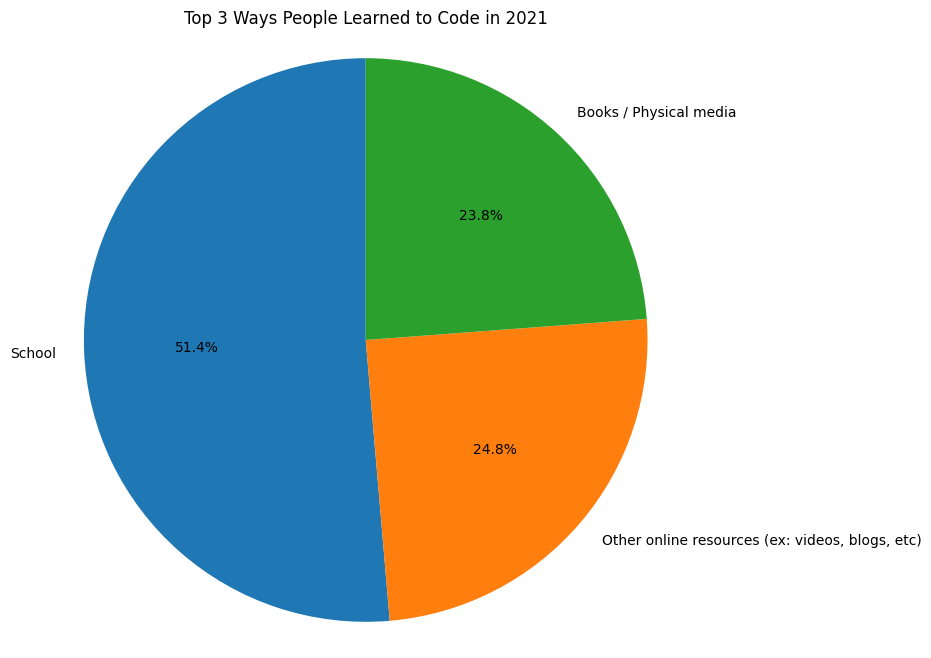

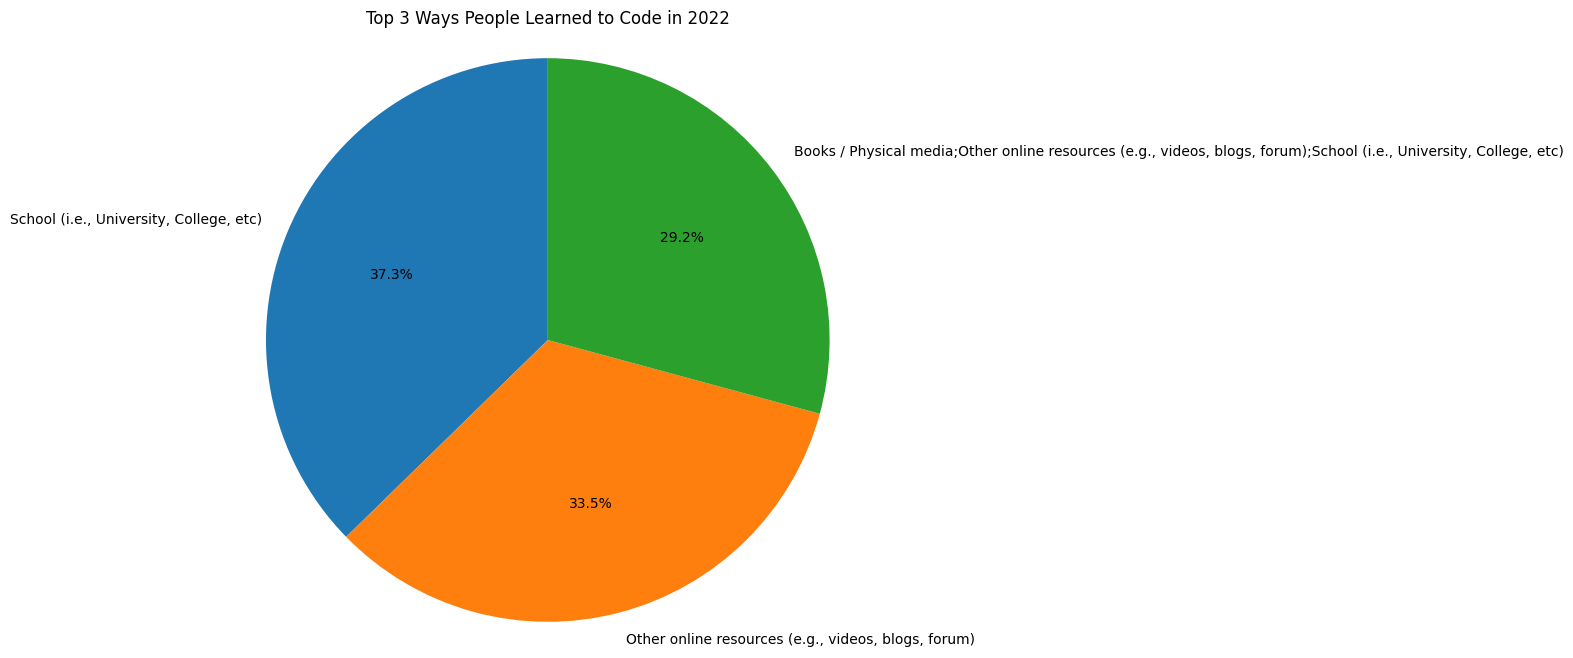

In [17]:

def visualize_pie_plot(top_learn_code_counts, year):
    """
    Visualize the top ways people learned to code using a pie plot.

    Parameters:
    - top_learn_code_counts (pd.Series): Series containing the counts of top learning methods.
    - year (int): The year for which the visualization is created.

    Returns:
    - None
    """
    # Select the top 3 ways people learned to code
    top_3_learn_code = top_learn_code_counts.head(3)

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(top_3_learn_code, labels=top_3_learn_code.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 3 Ways People Learned to Code in {year}")

    # Set a common aspect ratio to ensure the pie is drawn as a circle
    plt.axis('equal')

    plt.show()

# Visualize for 2021
visualize_pie_plot(learn_code_2021, 2021)

# Visualize for 2022
visualize_pie_plot(learn_code_2022, 2022)


### Observations and Insights:

The pie charts illustrate the top ways people learned to code in 2021 and 2022. Notable changes and trends in learning methods can be observed from the comparison. From the pie charts, we observe that in 2021, 51.4% of people learned code from School, 24.8% learnd code from other Online Sources (e.g videos, blogs, forum, etc..) and 23.8% learned code from Books/Physical media.


# Business Question 3:
### What are the top programming languages people work with in Netherlands between 2019 and 2020?

To answer this question, we will clean and prepare the data by dropping rows with missing values in 'Country' and 'LanguageWorkedWith' columns. We will then calculate the interval of 'LanguageWorkedWith' for Netherlands in 2019 and 2020. Finally, we will visualize the top 10 programming languages using a bar plot.


In [18]:
def clean_and_prepare_clww(df):
    """
    Clean and prepare the DataFrame by dropping rows with missing values in 'Country' and 'LanguageWorkedWith' columns.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Cleaned DataFrame.
    """
    # Drop rows with missing values in 'Country' and 'LanguageWorkedWith' columns
    df_cleaned_clww = df.dropna(subset=['Country', 'LanguageWorkedWith'])

    return df_cleaned_clww

# Clean and prepare the DataFrame for the year 2019 with the 'Country' and 'LanguageWorkedWith' columns
df_2019_cleaned_clww = clean_and_prepare_clww(df_2019)

# Clean and prepare the DataFrame for the year 2020 with the 'Country' and 'LanguageWorkedWith' columns
df_2020_cleaned_clww = clean_and_prepare_clww(df_2020)


In [19]:
def calculate_language_interval(df, country):
    """
    Calculate the interval of 'LanguageWorkedWith' for a specific country.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - country (str): The country for which the language interval is calculated.

    Returns:
    - pd.Series: Series containing the counts of each programming language.
    """
    # Filter the DataFrame for the specified country
    df_country = df[df['Country'] == country]

    # Count the occurrences of each programming language
    language_counts = df_country['LanguageWorkedWith'].str.split(';').explode().value_counts()

    return language_counts

# Calculate the interval of 'LanguageWorkedWith' for the Netherlands in 2019
language_2019 = calculate_language_interval(df_2019_cleaned_clww, 'Netherlands')

# Calculate the interval of 'LanguageWorkedWith' for the Netherlands in 2020
language_2020 = calculate_language_interval(df_2020_cleaned_clww, 'Netherlands')


In [20]:
def calculate_percentage(language_counts, total_responses):
    """
    Calculate the percentage of each programming language based on total responses.

    Parameters:
    - language_counts (pd.Series): Series containing the counts of each programming language.
    - total_responses (int): Total number of responses for a specific country and year.

    Returns:
    - pd.Series: Series containing the percentages of each programming language.
    """
    # Calculate the percentage of each programming language
    percentages = (language_counts / total_responses) * 100
    return percentages

# Calculate the total responses for the Netherlands in 2019 and 2020
total_responses_2019 = len(df_2019_cleaned[df_2019_cleaned['Country'] == 'Netherlands'])
total_responses_2020 = len(df_2020_cleaned[df_2020_cleaned['Country'] == 'Netherlands'])

# Calculate the percentage of each programming language for 2019 and 2020
percentage_2019 = calculate_percentage(language_2019, total_responses_2019)
percentage_2020 = calculate_percentage(language_2020, total_responses_2020)


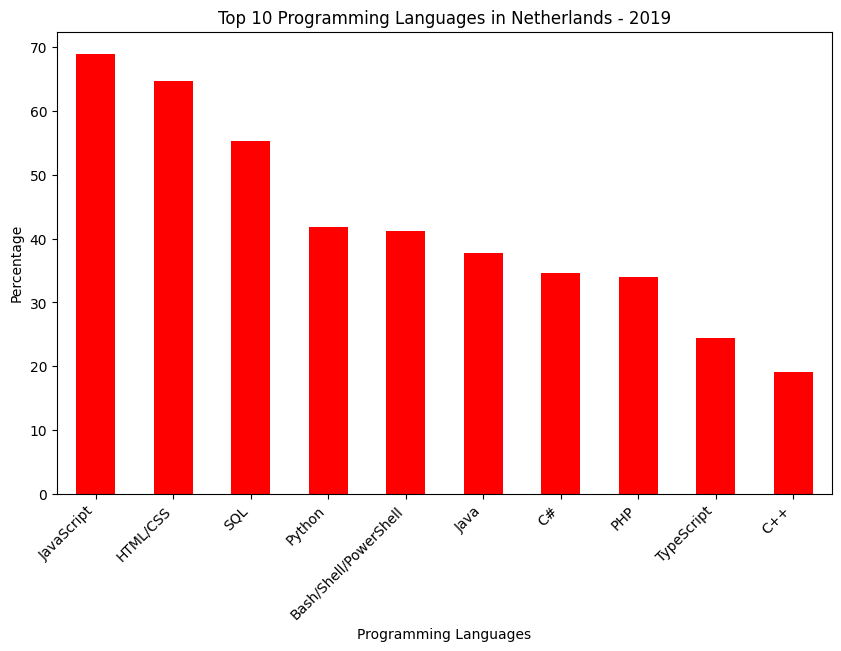

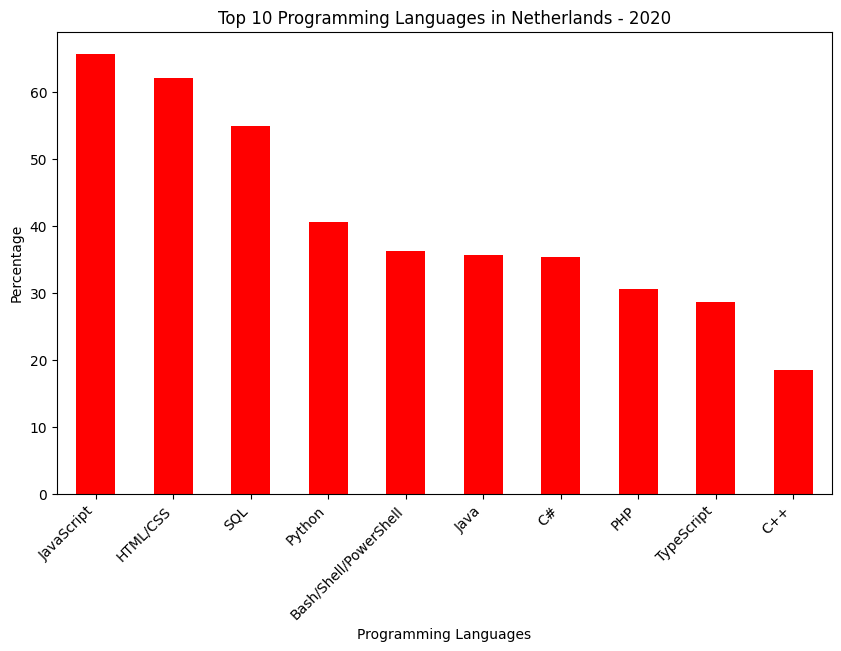

In [21]:

def visualize_percentage_bar_plot(language_percentages, year):
    """
    Visualize the top programming languages using a bar plot.

    Parameters:
    - language_percentages (pd.Series): Series containing the percentages of each programming language.
    - year (int): The year for which the visualization is created.

    Returns:
    - None
    """
    # Select the top 10 programming languages
    top_10_languages = language_percentages.head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_10_languages.plot(kind='bar', color='red')
    plt.title(f"Top 10 Programming Languages in Netherlands - {year}")
    plt.xlabel("Programming Languages")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Visualize for 2019
visualize_percentage_bar_plot(percentage_2019, 2019)

# Visualize for 2020
visualize_percentage_bar_plot(percentage_2020, 2020)


### Observations and Insights:

The bar plots display the top programming languages used in Netherlands in 2019 and 2020. The percentage distribution provides insights into the popularity and trends of programming languages in Netherlands. From the plots, we observe that JavaScripts came first with more than 65%, HTML/CSS came seconed with more than 60%, SQL camed third with nearly 55%, Python came fourth with 40% and Bash/Shell/PowerShell came fifth with nearly 35%.

### Conclusion

The analysis of the Stack Overflow Developer Survey results from 2019 to 2022 has unveiled significant trends and patterns in the software development landscape. Here are the key takeaways:

#### Employment Types Evolution (2019-2021):
The bar plots depicting the distribution of employment types reveal a consistent trend over the years. More than 60% of respondents across the surveyed years reported being employed full-time, indicating a stable reliance on traditional full-time employment in the software development industry. Students make up more than 10% of respondents, suggesting a steady influx of new talent into the field. Additionally, contractors, freelancers, or self-employed individuals constitute slightly below 10%, reflecting a vibrant ecosystem of independent professionals. Notably, other employment types each comprise less than 5%, indicating a diversified but comparatively smaller segment.

#### Learning Coding Methods (2021-2022):
The pie charts detailing the top ways people learned to code in 2021 and 2022 shed light on evolving preferences. In 2021, a substantial 51.4% of individuals learned to code through formal education channels like schools, underlining the continued importance of structured learning. Another noteworthy trend is the prevalence of online sources, with 24.8% relying on various online platforms such as videos, blogs, and forums. Additionally, 23.8% favored traditional resources like books and physical media. This diversity in learning methods underscores the accessibility and flexibility developers seek in their educational journey.

#### Programming Languages in Netherlands (2019-2020):
The bar plots showcasing the top programming languages used in Netherlands in 2019 and 2020 provide insights into language popularity and trends. JavaScript consistently takes the lead, with more than 65%, highlighting its ubiquitous presence in web development. HTML/CSS closely follows, exceeding 60%, emphasizing the foundational role of these technologies. SQL secures the third position, garnering nearly 55% usage, showcasing its importance in database-related tasks. Python, at around 40%, demonstrates sustained popularity, while Bash/Shell/PowerShell, at nearly 35%, highlights the significance of scripting languages. These language preferences align with the dynamic requirements of the industry.

In conclusion, the software development industry exhibits resilience and adaptability, with professionals leaning towards full-time employment, embracing diverse learning methods, and favoring a set of core programming languages. As we navigate through these insights, it is evident that the landscape is dynamic, shaped by a combination of traditional foundations and emerging trends. This analysis contributes to a nuanced understanding of the developer community, providing valuable information for developers, organizations, and educational institutions.
